In [1]:
import glob
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from helpers.assess import make_classification_report, make_confusion_matrix
from helpers.split import make_train_test_split, tag_label_feature_split

In [2]:
def logistic_regression_experiment(
    dataset, optimizer="lbfgs", max_iteration=5000, verbose=0
):

    dataset_name = os.path.basename(dataset).split(".")[0]
    experiment_label = "logistic_regression_" + dataset_name
    print(f"\n\nExperiment: {experiment_label}\n")
    
    # load data and separate label strings from features,
    # then encode label strings

    df = pd.read_pickle(dataset)
    _, (y, le), X = tag_label_feature_split(df, label_format="encoded")

    # divide into train and test data sets
    X_train_std, X_test_std, y_train, y_test = make_train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y, x_scaler="standard"
    )

    model = LogisticRegression(
        C=100.0,
        solver=optimizer,
        multi_class="multinomial",
        class_weight="balanced",
        max_iter=max_iteration,
        verbose=verbose,
    )

    model.fit(X_train_std, y_train)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    print(f"Train: {train_accuracy = :f}\n")
    make_classification_report(
        y_train,
        model=model,
        x=X_train_std,
        digits=4,
        label_encoder=le,
        print_report=True,
        save_result=True,
        result_filename="rich_results.json",
        model_name=experiment_label+"_train",
        repeat=True
    )
    print(f"Test: {test_accuracy = :f}\n")
    make_classification_report(
        y_test, 
        y_pred=predictions, 
        digits=4, 
        label_encoder=le, 
        print_report=True,
        save_result=True,
        result_filename="rich_results.json",
        model_name=experiment_label+"_test",
        repeat=True
    )

    make_confusion_matrix(
        y_test,
        y_pred=predictions,
        label_encoder=le,
        title=f"{dataset_name} test (row normalized)",
    )

    return model



Experiment: logistic_regression_dataset_00_all



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.973770

Test logistic_regression_dataset_00_all_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  1.0000    1.0000      374  1.0000
  genre_classical     0.9983  0.9991    0.9987     4221  0.9983
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     1.0000  1.0000    1.0000     1701  1.0000
       genre_jazz     0.9992  1.0000    0.9996     1241  0.9996
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     0.9566  0.9385    0.9474     4274  0.9302
     genre_reggae     1.0000  1.0000    1.0000      788  1.0000
       genre_rock     0.9213  0.9434    0.9322     3200  0.9165
                                                               
         accuracy               

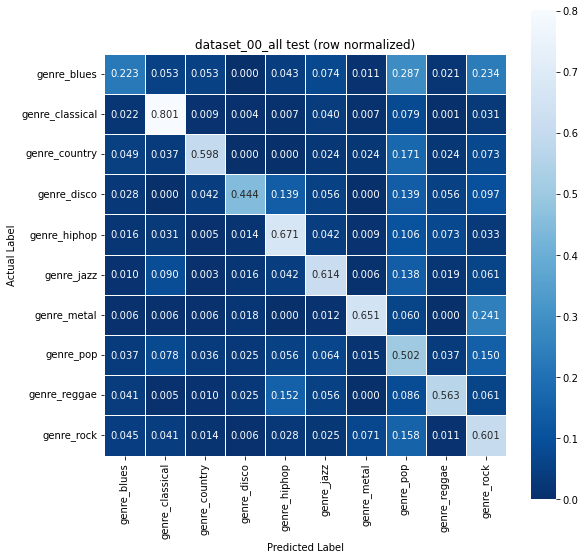



Experiment: logistic_regression_dataset_01_mean

Train: train_accuracy = 0.384016

Test logistic_regression_dataset_01_mean_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0511  0.1738    0.0790      374  0.0566
  genre_classical     0.8099  0.7195    0.7620     4221  0.6920
    genre_country     0.0870  0.3823    0.1417      327  0.1500
      genre_disco     0.0804  0.3979    0.1337      289  0.1488
     genre_hiphop     0.3730  0.2745    0.3163     1701  0.2568
       genre_jazz     0.2667  0.3900    0.3168     1241  0.2577
      genre_metal     0.2495  0.6872    0.3660      665  0.3772
        genre_pop     0.4922  0.1331    0.2096     4274  0.1505
     genre_reggae     0.2081  0.2995    0.2456      788  0.2059
       genre_rock     0.5017  0.3137    0.3861     3200  0.2935
                                            

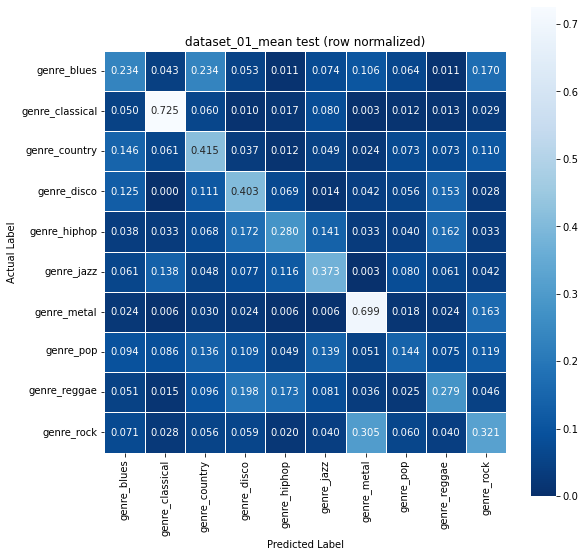



Experiment: logistic_regression_dataset_02_mean_cov

Train: train_accuracy = 0.505972

Test logistic_regression_dataset_02_mean_cov_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.1048  0.3476    0.1611      374  0.1586
  genre_classical     0.8662  0.7711    0.8159     4221  0.7622
    genre_country     0.1738  0.6606    0.2752      327  0.3161
      genre_disco     0.1394  0.6194    0.2276      289  0.2708
     genre_hiphop     0.5576  0.4550    0.5011     1701  0.4549
       genre_jazz     0.4146  0.5439    0.4705     1241  0.4276
      genre_metal     0.3392  0.7789    0.4726      665  0.4864
        genre_pop     0.6306  0.2356    0.3430     4274  0.2820
     genre_reggae     0.4333  0.6434    0.5179      788  0.5005
       genre_rock     0.6151  0.4316    0.5073     3200  0.4265
                                    

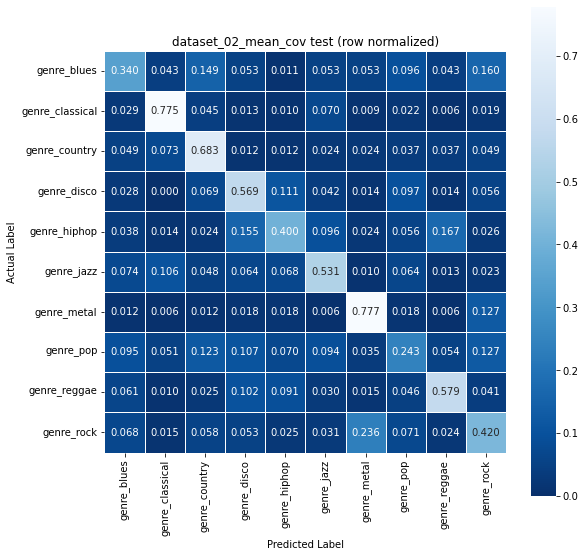



Experiment: logistic_regression_dataset_03_mean_icov

Train: train_accuracy = 0.394731

Test logistic_regression_dataset_03_mean_icov_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0555  0.1738    0.0841      374  0.0623
  genre_classical     0.8148  0.7140    0.7611     4221  0.6920
    genre_country     0.0915  0.4465    0.1518      327  0.1695
      genre_disco     0.0985  0.4221    0.1598      289  0.1769
     genre_hiphop     0.3821  0.2457    0.2991     1701  0.2468
       genre_jazz     0.2885  0.4110    0.3390     1241  0.2825
      genre_metal     0.2644  0.6842    0.3814      665  0.3901
        genre_pop     0.5350  0.1324    0.2123     4274  0.1689
     genre_reggae     0.2232  0.4949    0.3077      788  0.2850
       genre_rock     0.5315  0.3300    0.4072     3200  0.3200
                                  

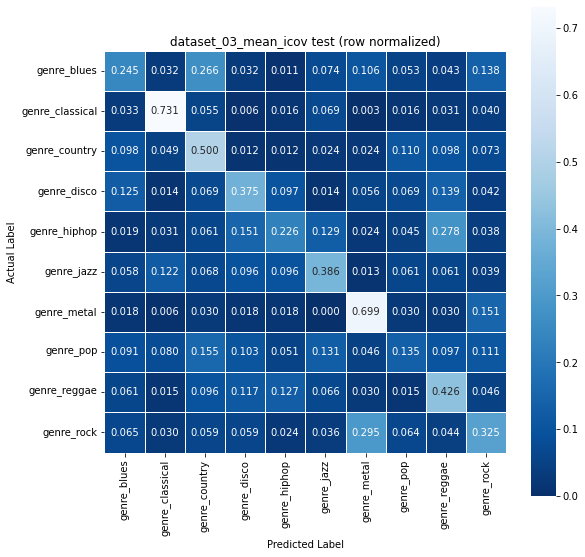



Experiment: logistic_regression_dataset_04_mean_cov_icov



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.506440

Test logistic_regression_dataset_04_mean_cov_icov_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.1087  0.3743    0.1685      374  0.1694
  genre_classical     0.8691  0.7707    0.8169     4221  0.7639
    genre_country     0.1739  0.6697    0.2762      327  0.3187
      genre_disco     0.1461  0.6436    0.2382      289  0.2843
     genre_hiphop     0.5597  0.4633    0.5069     1701  0.4605
       genre_jazz     0.4124  0.5504    0.4715     1241  0.4289
      genre_metal     0.3467  0.7774    0.4796      665  0.4921
        genre_pop     0.6313  0.2295    0.3367     4274  0.2783
     genre_reggae     0.4325  0.6586    0.5221      788  0.5063
       genre_rock     0.6178  0.4263    0.5044     3200  0.4250
                                                               
         accuracy     

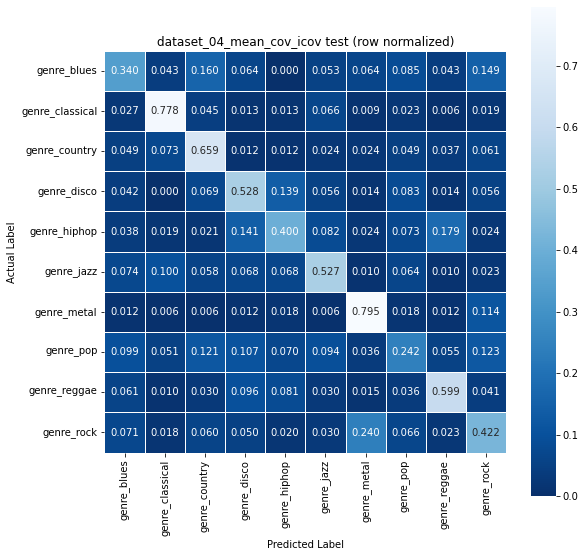



Experiment: logistic_regression_dataset_05_pvtt

Train: train_accuracy = 0.417681

Test logistic_regression_dataset_05_pvtt_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0411  0.0481    0.0443      374  0.0213
  genre_classical     0.8656  0.7764    0.8185     4221  0.7651
    genre_country     0.0797  0.3058    0.1265      327  0.1245
      genre_disco     0.1041  0.4464    0.1688      289  0.1891
     genre_hiphop     0.3518  0.2393    0.2848     1701  0.2270
       genre_jazz     0.3017  0.4053    0.3459     1241  0.2902
      genre_metal     0.2411  0.7714    0.3673      665  0.3942
        genre_pop     0.5537  0.1544    0.2415     4274  0.1919
     genre_reggae     0.2546  0.5799    0.3539      788  0.3405
       genre_rock     0.4414  0.3344    0.3805     3200  0.2648
                                            

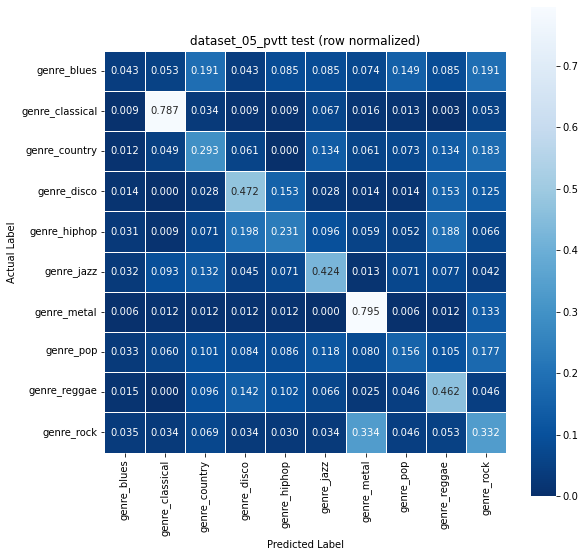



Experiment: logistic_regression_dataset_06_pvtt_mean

Train: train_accuracy = 0.458782

Test logistic_regression_dataset_06_pvtt_mean_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0649  0.1791    0.0952      374  0.0745
  genre_classical     0.8780  0.7925    0.8330     4221  0.7836
    genre_country     0.1053  0.4465    0.1705      327  0.1869
      genre_disco     0.1057  0.4602    0.1719      289  0.1942
     genre_hiphop     0.4763  0.3962    0.4326     1701  0.3781
       genre_jazz     0.3684  0.4658    0.4114     1241  0.3623
      genre_metal     0.2888  0.7383    0.4152      665  0.4295
        genre_pop     0.5774  0.1701    0.2628     4274  0.2131
     genre_reggae     0.3131  0.5508    0.3993      788  0.3782
       genre_rock     0.5481  0.3878    0.4542     3200  0.3614
                                  

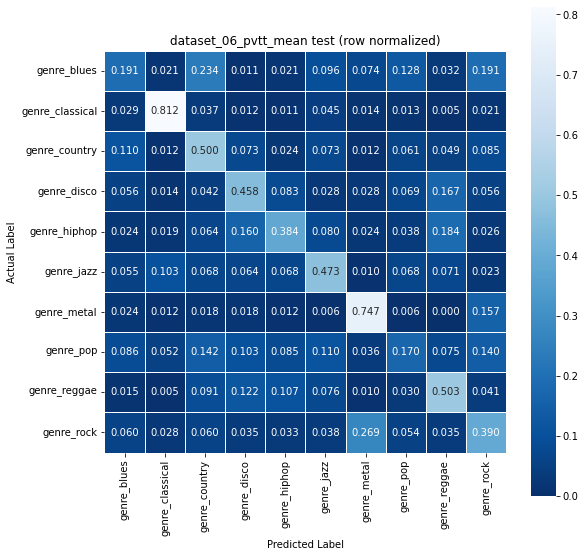



Experiment: logistic_regression_dataset_07_pvtt_mean_cov

Train: train_accuracy = 0.540749

Test logistic_regression_dataset_07_pvtt_mean_cov_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.1236  0.4118    0.1901      374  0.1949
  genre_classical     0.8896  0.8133    0.8498     4221  0.8047
    genre_country     0.1926  0.6820    0.3003      327  0.3413
      genre_disco     0.1665  0.6713    0.2669      289  0.3138
     genre_hiphop     0.6019  0.5350    0.5664     1701  0.5227
       genre_jazz     0.4455  0.5898    0.5076     1241  0.4686
      genre_metal     0.3525  0.7759    0.4847      665  0.4963
        genre_pop     0.6601  0.2576    0.3706     4274  0.3113
     genre_reggae     0.4753  0.6954    0.5647      788  0.5504
       genre_rock     0.6442  0.4453    0.5266     3200  0.4516
                          

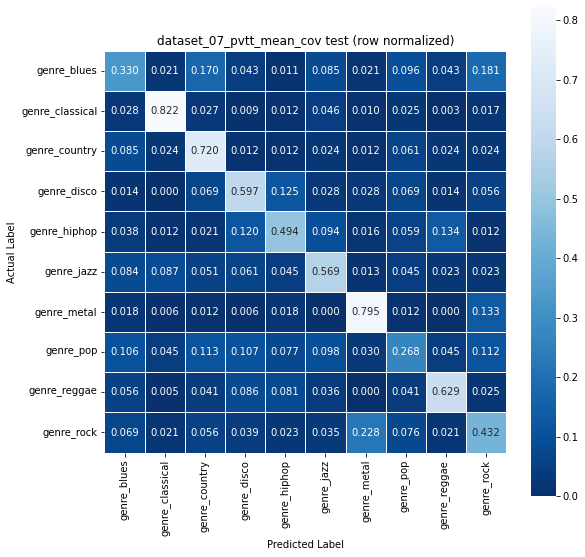



Experiment: logistic_regression_dataset_08_pvtt_mean_icov

Train: train_accuracy = 0.466803

Test logistic_regression_dataset_08_pvtt_mean_icov_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0705  0.1979    0.1040      374  0.0850
  genre_classical     0.8763  0.7891    0.8305     4221  0.7804
    genre_country     0.1121  0.4985    0.1830      327  0.2069
      genre_disco     0.1205  0.4948    0.1938      289  0.2194
     genre_hiphop     0.4801  0.3980    0.4352     1701  0.3812
       genre_jazz     0.3768  0.4754    0.4204     1241  0.3722
      genre_metal     0.2996  0.7383    0.4262      665  0.4390
        genre_pop     0.5924  0.1724    0.2671     4274  0.2214
     genre_reggae     0.3224  0.5964    0.4185      788  0.4023
       genre_rock     0.5709  0.4053    0.4740     3200  0.3850
                        

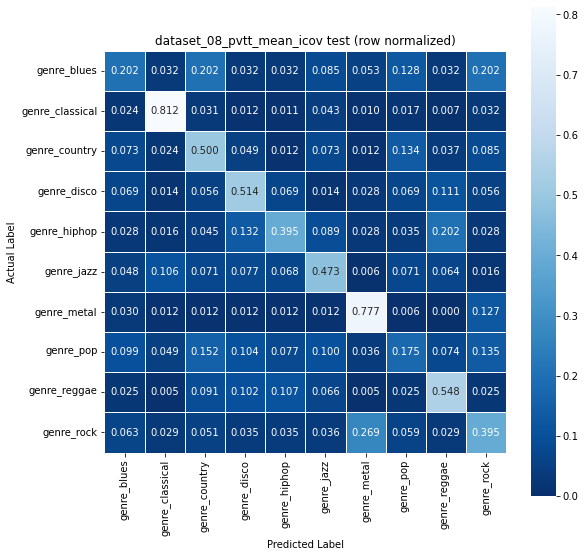



Experiment: logistic_regression_dataset_09_pvtt_mean_cov_icov



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.542037

Test logistic_regression_dataset_09_pvtt_mean_cov_icov_train is already in record, proceed to override.
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.1220  0.4118    0.1883      374  0.1933
  genre_classical     0.8915  0.8119    0.8498     4221  0.8051
    genre_country     0.1901  0.6911    0.2982      327  0.3412
      genre_disco     0.1694  0.6886    0.2719      289  0.3213
     genre_hiphop     0.6150  0.5485    0.5799     1701  0.5374
       genre_jazz     0.4472  0.5874    0.5078     1241  0.4687
      genre_metal     0.3574  0.7729    0.4888      665  0.4992
        genre_pop     0.6644  0.2539    0.3674     4274  0.3109
     genre_reggae     0.4753  0.7094    0.5692      788  0.5564
       genre_rock     0.6462  0.4475    0.5288     3200  0.4541
                                                               
         accuracy

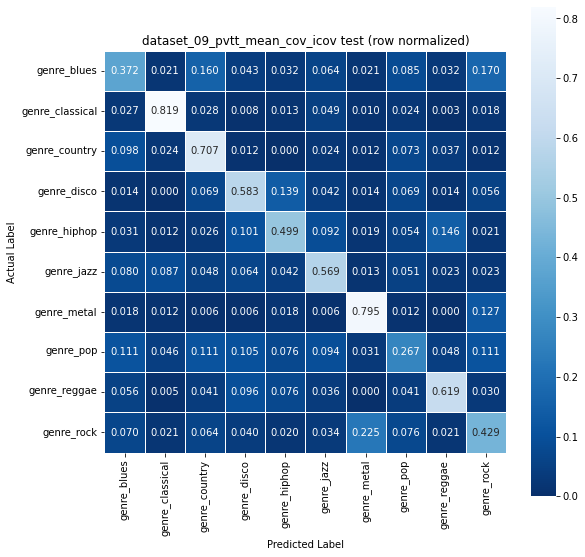



Experiment: logistic_regression_dataset_10_melspectrograms_flattened



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.999063

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.9973  1.0000    0.9987      374  0.9986
  genre_classical     0.9998  0.9988    0.9993     4221  0.9991
    genre_country     1.0000  1.0000    1.0000      327  1.0000
      genre_disco     1.0000  1.0000    1.0000      289  1.0000
     genre_hiphop     0.9988  0.9994    0.9991     1701  0.9990
       genre_jazz     1.0000  0.9992    0.9996     1241  0.9996
      genre_metal     1.0000  1.0000    1.0000      665  1.0000
        genre_pop     0.9998  0.9981    0.9989     4274  0.9986
     genre_reggae     0.9937  1.0000    0.9968      788  0.9967
       genre_rock     0.9981  0.9997    0.9989     3200  0.9987
                                                               
         accuracy                       0.9991    17080  0.9989
        macro avg     0.9988  0.9995    0.9991    17080  

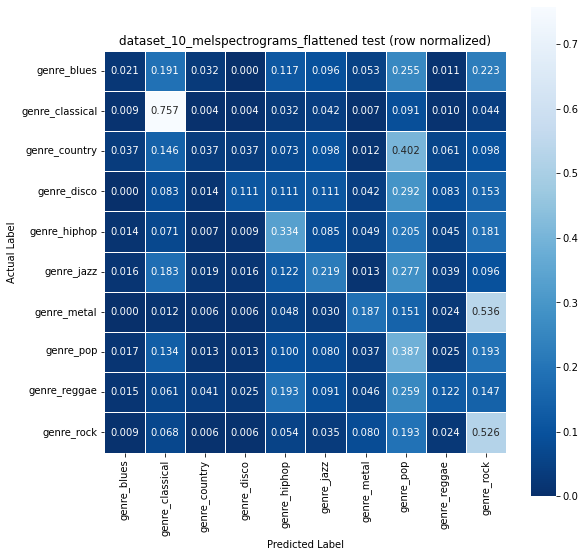

In [3]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
for dataset in datasets:
    logistic_regression_experiment(dataset)